In [5]:
import os
import re
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from normflows.distributions import DiagGaussian
from dataset.TwoMoonDataset import TwoMoonDataset
import torch
from flow_models.PatchFlow import PatchFlow
import torchvision as tv
import numpy as np

In [6]:
model = 'patch_flow_simple'
version = 1
selected_checkpoint = 0

In [7]:
regex = re.compile(r'epoch=(\d+)-step=\d+\.ckpt')
path_to_checkpoint = f'../tb_logs/{model}/version_{version}'
h_params = f'{path_to_checkpoint}/hparams.yaml'
checkpoints_path = f'{path_to_checkpoint}/checkpoints/'
selected_checkpoint_file = None
for filename in os.listdir(checkpoints_path):
    match = regex.match(filename)
    if match:
        epoch_index = int(match.group(1))
        if epoch_index == selected_checkpoint:
            selected_checkpoint_file = filename
checkpoint_path = os.path.join(checkpoints_path, selected_checkpoint_file)
print(f'h_params:{h_params}')
print(f'Checkpoint:{checkpoint_path}')

h_params:../tb_logs/patch_flow_simple/version_1/hparams.yaml
Checkpoint:../tb_logs/patch_flow_simple/version_1/checkpoints/epoch=0-step=1000.ckpt


In [8]:
flow = PatchFlow.load_from_checkpoint(checkpoint_path=checkpoint_path, hparams_file=h_params, map_location='cpu')

/home/pb/.local/lib/python3.10/site-packages/torch/_tensor.py:677: UserWarning: torch.lu is deprecated in favor of torch.linalg.lu_factor / torch.linalg.lu_factor_ex and will be removed in a future PyTorch release.
LU, pivots = torch.lu(A, compute_pivots)
should be replaced with
LU, pivots = torch.linalg.lu_factor(A, compute_pivots)
and
LU, pivots, info = torch.lu(A, compute_pivots, get_infos=True)
should be replaced with
LU, pivots, info = torch.linalg.lu_factor_ex(A, compute_pivots) (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1991.)
  LU, pivots, infos = torch._lu_with_info(


In [14]:
flow.model.sample(1)

(tensor([[[[-2.3711, -2.6707,  0.4181,  0.5576, -0.8522, -0.8708, -1.5871,
            -1.3451],
           [-2.3996, -2.3907,  0.1967, -0.0397, -0.8591, -0.9970, -1.6746,
            -1.9422],
           [-0.2001, -0.3092,  0.9779,  1.1660, -0.1103,  0.0905, -2.8229,
            -2.7669],
           [-0.2739, -0.4313,  0.7018,  0.3762, -0.2337, -0.5023, -2.8526,
            -2.9772],
           [-0.0991,  0.1841, -0.8067, -0.9636, -1.3137, -0.6981, -3.8486,
            -3.7737],
           [-0.3917, -0.9902, -0.8533, -1.1877, -1.4843, -2.0147, -3.6197,
            -3.8289],
           [-0.0257,  0.3134, -1.9022, -2.2052, -2.7945, -2.8224, -2.5856,
            -2.3251],
           [-0.2571, -0.8606, -1.9688, -2.2163, -2.7457, -2.9498, -2.4722,
            -2.8344]]]], grad_fn=<ViewBackward0>),
 tensor([37.5685], grad_fn=<SubBackward0>))

In [18]:
num_samples = 10
samples = [flow.model.sample()[0].detach().numpy() for _ in range(num_samples)]

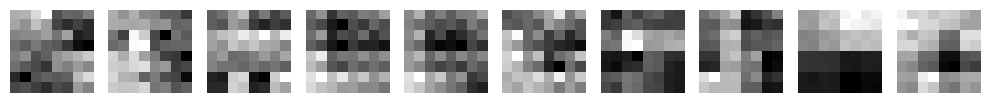

In [19]:
fig, axes = plt.subplots(1, num_samples, figsize=(10, 5))
for i in range(num_samples):
    axes[i].imshow(samples[i].squeeze(), cmap='gray')
    axes[i].axis('off')
plt.tight_layout()
plt.show()